<a href="https://colab.research.google.com/github/yasiruranasinghe28/ProdL/blob/master/HW2_dranasi1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# You may need to run "pip3 install scikit-image"
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize
from scipy.signal import convolve2d
from skimage.io import imread
import numpy as np
import os

# You may not import any other libraries.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# HOMEWORK 2

## Problem 1: Simple Face Detector

Implement a simple face detector that can detect faces in group photos of people.


In [2]:
# Data path for the homework
DataPath = '/content/drive/MyDrive/Colab Notebooks/MLSP HW 2/data'
ResultPath = '/content/drive/MyDrive/Colab Notebooks/MLSP HW 2/results'

# Create the results folder if not exists
os.mkdir(ResultPath) if not os.path.exists(ResultPath) else None

In [3]:
# Make or change directory
def get_directory(folder_name):
  
  # Check if the path exists and change
  if not os.path.exists(os.path.join(DataPath, folder_name)):
    raise Exception("Add the {} folder to the data folder".format(folder_name))
  else:
    os.chdir(os.path.join(DataPath, folder_name))


# Get the file names in the folder
def get_file_names(format='.pgm'):

  files = []
  for file_name in os.listdir():
    # Check only .pgm files
    files.append(file_name) if file_name.endswith(format) else None
  # Sort the file names alphabetically
  files.sort()

  return files


# Import the images for a given file name
def import_file(file_name):

  # Import the image
  file_path = os.path.join(os.getcwd(), file_name)
  file_image = imread(file_path, as_gray=True)

  # Normalize the image between 0 and 1
  file_image = file_image/255 if np.max(file_image) > 1 else file_image

  return file_image


# Import the images for a given folder name
def import_folder(file_names):

  folder_images = []
  # Iterate over the file names and import image
  for index, file_name in enumerate(file_names):
    
    # Print the range of importing folder files
    if index % 100 == 0:
      max_digits = 1 + int(np.floor(np.log10(len(file_names))))
      print(str(max_digits).join(['Importing the {:0','.0f} to {:0','.0f} images']).
            format(index+1, np.min([index+100, len(file_names)])))
      
    file_image = import_file(file_name)
    file_image = np.asarray(file_image).astype('float64')
    # Append to the image cube
    folder_images.append(file_image)

  # Convert the list into an array
  folder_images = np.asarray(folder_images)

  return folder_images


# Plot the 2D image of a given array
def plot_face(face_array):
  # Check the dimensions of the face array
  try:
    face = face_array.reshape(height, width)
  except ValueError:
    raise Exception("Image dimensions are incompatible")
  
  # Plot the face
  plt.imshow(face)


# Mean normalize the training dataset
def mean_normalize(dataset, mean=None):

  # Compute the mean for the train dataset
  if mean == None:
    mean = np.mean(dataset, axis=0)

  # Remove the mean from the dataset
  dataset -= mean

  return dataset, mean


# Compute the eigenfaces of the images
def compute_eigen_faces(dataset):
  
  # Check the arangement of the dataset
  """
  Rows: pixel position
  Columns: individual faces
  """
  dataset = dataset.reshape(dataset.shape[0],-1).T
  
  print('\nComputing the eigen faces')

  # Perform singular value decomposition on the 2D array
  U, _, _ = np.linalg.svd(dataset, full_matrices=True)

  # Reshape the eigen faces array as a cube
  U = U.T.reshape(-1,height,width)[:train_size]

  return U


# Format the images by removing axis ticks and titles
def format_image(ax, title):
  ax.set_title(title)
  ax.get_xaxis().set_ticks([])
  ax.get_yaxis().set_ticks([])


# Save figures in given folders
def save_image(figure, folder, file):

  # Check if the folder exists if not create
  if not os.path.exists(os.path.join(ResultPath, folder)):
    os.mkdir(os.path.join(ResultPath, folder))
    os.chdir(os.path.join(ResultPath, folder))
  else:
    os.chdir(os.path.join(ResultPath, folder))

  format = 'png'
  # Save the figure in the folder
  figure.savefig('.'.join([file,format]), format=format)

Importing the 0001 to 0100 images
Importing the 0101 to 0200 images
Importing the 0201 to 0300 images
Importing the 0301 to 0400 images
Importing the 0401 to 0500 images
Importing the 0501 to 0600 images
Importing the 0601 to 0700 images
Importing the 0701 to 0800 images
Importing the 0801 to 0900 images
Importing the 0901 to 1000 images
Importing the 1001 to 1071 images

Computing the eigen faces


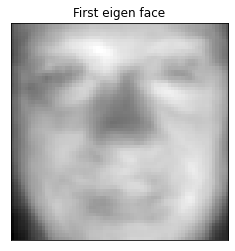

In [4]:
# Read the face images for the training dataset
folder_name = 'lfw_1000'

# Check if the training folder is added to the data path
# If 'Yes' change the working director to training data folder
get_directory(folder_name)

# Get the file names in the training dataset
files = get_file_names()

# Get the training images
train_dataset = import_folder(files)

# Declare train_size, height and width as global variables
global train_size, height, width
train_size, height, width = train_dataset.shape

# Mean normalize the train dataset and save the mean face
train_dataset, mean_face = mean_normalize(train_dataset)

# Compute the eigen faces for the train dataset
eigen_faces = compute_eigen_faces(train_dataset)

# Plot the first eigen face and save
prime_face = eigen_faces[0] if np.max(eigen_faces[0]) > 0 else -eigen_faces[0]
fig1, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
ax.imshow(prime_face, cmap='binary_r')
format_image(ax, 'First eigen face')
save_image(fig1, file='First eigen face',
           folder='problem 1')

# Eigen faces are computed and the first eigen face is stored in results


# Read the face images for the training dataset
folder_name = 'groups'

# Check if the training folder is added to the data path
# If 'Yes' change the working director to training data folder
get_directory(folder_name)

# Get the file names in the training dataset
files = get_file_names()

# Get the training images
test_dataset = import_folder(files)

In [5]:
# Scale the eigen face
def scale_face(prime_face, scaling_factor=1):

  # Scale the eigen face
  scale_face = rescale(prime_face, scale=scaling_factor, anti_aliasing=True)
  scale_face = scale_face/np.sum(scale_face**2)

  return scale_face


# Compute parameters for the effect of the mean face 
def compute_mean_affects(mean_face, kernel):

  # Compute the effect for the kernel convolution
  mean_kernel_power = convolve2d(in1=mean_face,
                                 in2=np.fliplr(np.flipud(prime_face)),
                                 mode='valid')

  # Compute the effect for the power convolution
  mean_power = convolve2d(in1=mean_face**2,
                          in2=np.ones_like(kernel),
                          mode='valid')
  mean_power = np.sqrt(mean_power)

  return mean_kernel_power, mean_power


# Compute the match score between mean shifted image and scaled eigen face
def compute_score(input_image, kernel, mean_kernel, mean_score, mean_power):

  # Perform convolution with the face template
  score_matrix = convolve2d(in1=input_image,
                          in2=np.fliplr(np.flipud(kernel)),
                          mode='same'
                          )  
  
  # Compute the power of each image patch
  image_power = convolve2d(in1=input_image**2,
                          in2=np.ones_like(kernel),
                          mode='same'
                          )
  # Compute the average of the each image patch
  image_average = convolve2d(in1=input_image,
                          in2=np.ones_like(kernel),
                          mode='same'
                          )
  
  # Compute the correlation between scaled mean face and image
  mean_image_corr = convolve2d(in1=input_image,
                               in2=np.fliplr(np.flipud(mean_kernel)),
                               mode='same'
                               )
  
  # Compute the normalization factor for each patch due to image power and mean face affect
  # norm_image = np.sqrt(image_power - 2*mean_image_corr + mean_power**2) + 1e-8
  norm_image = np.sqrt(image_power) + 1e-8

  # Normalize each patch of the score matrix by the image length for the patch
  # score_matrix = (score_matrix-mean_score)/norm_image
  score_matrix = score_matrix/norm_image

  return score_matrix


# Compute the match scores across all scales for the test image
def get_match_scores(test_image, prime_face, scale_factors,
                     mean_score, mean_power):

  match_scores = []
  for scaling_factor in scale_factors:

    print('Computing the scores for the scale factor {:.2f}'.format(scaling_factor))
    # Construct the normalized scaled eigen face
    scale_prime_face = scale_face(prime_face, scaling_factor=1/scaling_factor)
    # Construct the scaled mean face
    scale_mean_face = rescale(prime_face, scale=1/scaling_factor, anti_aliasing=True)

    # Compute match scores for the image
    match_score = compute_score(test_image, scale_prime_face,
                                scale_mean_face, mean_score, mean_power)
    # append the match_scores
    match_scores.append(match_score)
  
  match_scores = np.asarray(match_scores)

  return match_scores

In [6]:
# Read the face images for the training dataset
folder_name = 'groups'

# Check if the training folder is added to the data path
# If 'Yes' change the working director to training data folder
get_directory(folder_name)

# Get the file names in the training dataset
files = get_file_names(format='.jpg')

# Compute the mean face affect
# mean_score, mean_power = compute_mean_affects(mean_face, prime_face)

# Perform the face detection for each group image
for file in files[2:]:

  # Import the image
  test_image = import_file(file)

  # Scale factors
  scale_factors = [0.5, 0.75, 1, 1.5, 2]
  match_scores = get_match_scores(test_image, prime_face,
                                  scale_factors,
                                  mean_score, mean_power
                                  )

  print(match_scores.shape)
  break

Test image is imported.


NameError: ignored

In [ ]:
for scores in match_scores:
  plt.figure()
  plt.imshow(scores, cmap='binary_r')

plt.figure()
plt.imshow(test_image, cmap='binary_r')

# print(convolve2d(in1=mean_face,
#            in2=np.fliplr(np.flipud(prime_face)),
#            mode='valid'))

# plt.hist(mean_face.reshape(-1))

## Problem 2: Boosting-based Face Detector

Implement an Adaboost Classifier to classify between face images and non-face images.


## Problem 3: Gender Detector

Implement a gender detection system using the PCA dimensions from images.
